# Aula 019 - Redução de Dimensionalidade (Parte 2)

Redução de dimensionalidade é o processo no qual nós minimizamos a quantidade de dados, descartando *features* desnecessárias, porém preservando o máximo de informação possível.



**E se eu tiver 100 variáveis independentes?**

* Complexidade computacional
* Visualização inviável
* Provavelmente há variáveis desnecessárias
* Modelo muito complexo

## Técnicas de redução de dimensionalidade

1. Feature Selection (Parte 1)
    * Proporção de valores ausentes
    * Baixa variância
    * Alta correlação
    * Backward feature elimination
    * Forward feature selection
2. Features extraction (Parte 2)
    * Factor Analysis
    * Principal Component Analysis

## Principal Component Analysis - PCA

**Etapas do PCA**

1. Padronizar os dados (média igual a 0 e variância igual a 1).
    * $z = \frac{x - \mu}{\sigma}$
2. Calcular a matriz de covariância
    * Mede a força da correácão entre duas variáveis
    * $cov(X, Y) = \frac{1}{n}\sum_{i=1}^{n}(X_i - \hat{X})(Y_i - \hat{Y})$
    * $cov(A,B) = A.B$
    * $cov = X^T X$
3. Obter os autovetores (eigenvectors) e autovalores (eigenvalues) da matrix de covariância
    * Encontrar as direções e máxima variância.
4. Escolher os Principal Components

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv( filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, sep=',')
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class'] 

In [ ]:
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


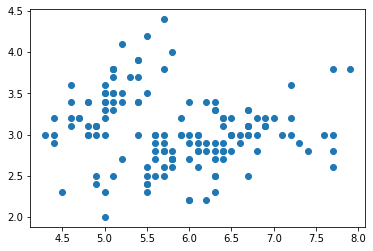

In [ ]:
fig, ax = plt.subplots()
plt.scatter(df['sepal_len'], df['sepal_wid'])
plt.show()

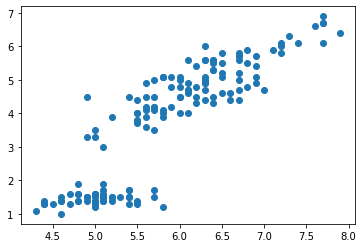

In [ ]:
fig, ax = plt.subplots()
plt.scatter(df['sepal_len'], df['petal_len'])
plt.show()

### 1. Padronizar os dados

In [ ]:
X = df.drop('class', axis=1).values
y = df['class'].values

In [ ]:
X_std = StandardScaler().fit_transform(X)

In [ ]:
X_std[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

### 2. Calcular a matriz de covariância

Essa será uma matriz $n \times n$, onde $n$ é o número de features do dataset. Cada elemento dessa matriz representa a covariância entre duas features quaisquer.

No exemplo que estamos vendo, o resultado será uma matriz $4 \times 4$.

In [ ]:
cov_matrix = np.cov(X_std, rowvar=False)

### 3. Obter os autovetores e autovalores a partir da matriz de covariância

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

### 4. Selecionar os Principal Components

In [ ]:
eig_vecs

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [ ]:
# ordenando os autovalores
eigen = pd.concat([pd.DataFrame(np.transpose(eig_vecs)), pd.DataFrame(eig_vals)], axis=1)
eigen.index = ['eigenvector1', 'eigenvector2', 'eigenvector3', 'eigenvector4']
eigen.columns =  range(5)
eigen.sort_values(by=4, ascending=False, inplace=True)
eigen

,0,1,2,3,4
eigenvector1,0.522372,-0.263355,0.581254,0.565611,2.930354
eigenvector2,-0.372318,-0.925556,-0.021095,-0.065416,0.927404
eigenvector3,-0.721017,0.242033,0.140892,0.633801,0.148342
eigenvector4,0.261996,-0.124135,-0.801154,0.523546,0.020746


## Usando o `scikit-learn`

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

In [ ]:
pc_df = pd.DataFrame(principal_components, columns=['pc1', 'pc2'])
pc_df

,pc1,pc2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925
...,...,...
145,1.944017,0.187415
146,1.525664,-0.375021
147,1.764046,0.078519
148,1.901629,0.115877


In [ ]:
df_final = pd.concat([pc_df, df['class']], axis=1)
df_final

,pc1,pc2,class
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa
...,...,...,...
145,1.944017,0.187415,Iris-virginica
146,1.525664,-0.375021,Iris-virginica
147,1.764046,0.078519,Iris-virginica
148,1.901629,0.115877,Iris-virginica


### Visualização gráfica


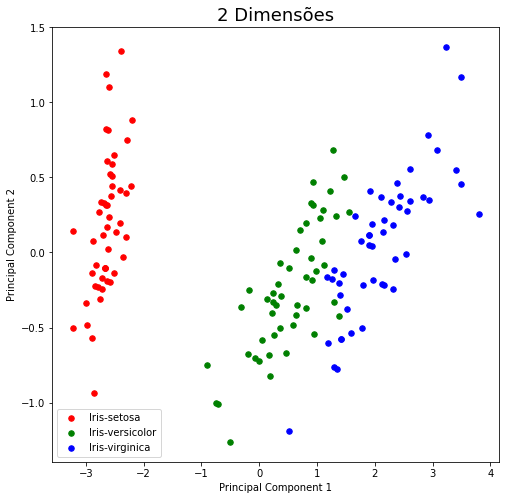

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))

classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cores = ['r', 'g', 'b']

for c, cor in zip(classes, cores):
    manter = df_final['class'] == c
    ax.scatter(df_final.loc[manter, 'pc1']
               , df_final.loc[manter, 'pc2']
               , c = cor
               , s = 30)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 Dimensões', fontsize = 18)
ax.legend(classes)
plt.show()

**Exemplo com 3 dimensões**


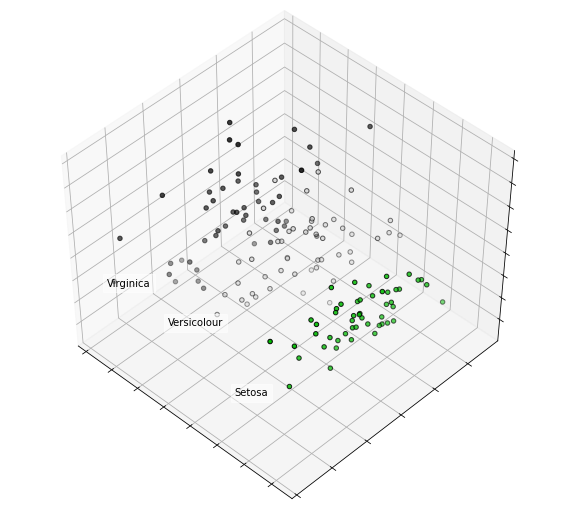

In [ ]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(8, 7))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()